In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
#pickle and joblib are used to save your trained model
import pickle
#from sklearn.externals import joblib
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset=pd.read_csv("Domestic Immigration.csv")
dataset

,State,NDIR,Unemp,Wage,Crime,Income,Metrop,Poor,Taxes,Educ,BusFail,Temp,Region
0,Alabama,17.47,6.0,10.75,780,27196,67.4,16.4,1553,66.9,0.20,62.77,South
1,Arizona,49.60,6.4,11.17,715,31293,84.7,15.9,2122,78.7,0.51,61.09,West
2,Arkansas,23.62,5.3,9.65,593,25565,44.7,15.3,1590,66.3,0.08,59.57,South
3,California,-37.21,8.6,12.44,1078,35331,96.7,17.9,2396,76.2,0.63,59.25,West
4,Colorado,53.17,4.2,12.27,567,37833,81.8,9.0,2092,84.4,0.42,43.43,West
5,Connecticut,-38.41,5.6,13.53,456,41097,95.7,10.8,3334,79.2,0.33,48.63,Northeast
6,Delaware,22.43,4.9,13.90,686,35873,82.7,8.3,2336,77.5,0.19,54.58,South
7,Florida,39.73,6.6,9.97,1206,29294,93.0,14.9,2048,74.4,0.36,70.64,South
8,Georgia,39.24,5.2,10.35,723,31467,67.7,14.0,1999,70.9,0.33,63.54,South
9,Idaho,71.41,5.6,11.88,282,31536,30.0,12.0,1916,79.7,0.31,42.35,West


In [3]:
dataset.isnull().sum()

State      0
NDIR       0
Unemp      0
Wage       0
Crime      0
Income     0
Metrop     0
Poor       0
Taxes      0
Educ       0
BusFail    0
Temp       0
Region     0
dtype: int64

# Numerical features

In [4]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='object']

print("Number of Numeric Variables ",len(numerical_features))
dataset[numerical_features]

Number of Numeric Variables  11


,NDIR,Unemp,Wage,Crime,Income,Metrop,Poor,Taxes,Educ,BusFail,Temp
0,17.47,6.0,10.75,780,27196,67.4,16.4,1553,66.9,0.20,62.77
1,49.60,6.4,11.17,715,31293,84.7,15.9,2122,78.7,0.51,61.09
2,23.62,5.3,9.65,593,25565,44.7,15.3,1590,66.3,0.08,59.57
3,-37.21,8.6,12.44,1078,35331,96.7,17.9,2396,76.2,0.63,59.25
4,53.17,4.2,12.27,567,37833,81.8,9.0,2092,84.4,0.42,43.43
5,-38.41,5.6,13.53,456,41097,95.7,10.8,3334,79.2,0.33,48.63
6,22.43,4.9,13.90,686,35873,82.7,8.3,2336,77.5,0.19,54.58
7,39.73,6.6,9.97,1206,29294,93.0,14.9,2048,74.4,0.36,70.64
8,39.24,5.2,10.35,723,31467,67.7,14.0,1999,70.9,0.33,63.54
9,71.41,5.6,11.88,282,31536,30.0,12.0,1916,79.7,0.31,42.35


# Categorical Features

In [5]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=="object"]
print("Number of Categorical Variables ",len(categorical_features))


Number of Categorical Variables  2


# Converting Categorical to Numerical

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for features in categorical_features:
    dataset[features]=label_encoder.fit_transform(dataset[features])

In [7]:
dataset

,State,NDIR,Unemp,Wage,Crime,Income,Metrop,Poor,Taxes,Educ,BusFail,Temp,Region
0,0,17.47,6.0,10.75,780,27196,67.4,16.4,1553,66.9,0.20,62.77,2
1,1,49.60,6.4,11.17,715,31293,84.7,15.9,2122,78.7,0.51,61.09,3
2,2,23.62,5.3,9.65,593,25565,44.7,15.3,1590,66.3,0.08,59.57,2
3,3,-37.21,8.6,12.44,1078,35331,96.7,17.9,2396,76.2,0.63,59.25,3
4,4,53.17,4.2,12.27,567,37833,81.8,9.0,2092,84.4,0.42,43.43,3
5,5,-38.41,5.6,13.53,456,41097,95.7,10.8,3334,79.2,0.33,48.63,1
6,6,22.43,4.9,13.90,686,35873,82.7,8.3,2336,77.5,0.19,54.58,2
7,7,39.73,6.6,9.97,1206,29294,93.0,14.9,2048,74.4,0.36,70.64,2
8,8,39.24,5.2,10.35,723,31467,67.7,14.0,1999,70.9,0.33,63.54,2
9,9,71.41,5.6,11.88,282,31536,30.0,12.0,1916,79.7,0.31,42.35,3


# Removing Outliers

In [8]:

for feature in numerical_features:
    
    if 0 in dataset[feature].unique():
        pass
    else:
        
        
        q1=dataset[feature].quantile(0.25)
        q3=dataset[feature].quantile(0.75)
        iqr=q3-q1
        lower_lim=q1-1.5*iqr
        upper_lim=q3+1.5*iqr
        
        dataset=dataset[(dataset[feature]<=upper_lim) & (dataset[feature]>=lower_lim)]
        
       

In [9]:
dataset

,State,NDIR,Unemp,Wage,Crime,Income,Metrop,Poor,Taxes,Educ,BusFail,Temp,Region
0,0,17.47,6.0,10.75,780,27196,67.4,16.4,1553,66.9,0.20,62.77,2
1,1,49.60,6.4,11.17,715,31293,84.7,15.9,2122,78.7,0.51,61.09,3
2,2,23.62,5.3,9.65,593,25565,44.7,15.3,1590,66.3,0.08,59.57,2
4,4,53.17,4.2,12.27,567,37833,81.8,9.0,2092,84.4,0.42,43.43,3
6,6,22.43,4.9,13.90,686,35873,82.7,8.3,2336,77.5,0.19,54.58,2
7,7,39.73,6.6,9.97,1206,29294,93.0,14.9,2048,74.4,0.36,70.64,2
8,8,39.24,5.2,10.35,723,31467,67.7,14.0,1999,70.9,0.33,63.54,2
9,9,71.41,5.6,11.88,282,31536,30.0,12.0,1916,79.7,0.31,42.35,3
10,10,-20.87,5.7,12.26,960,35081,84.0,12.4,2332,76.2,0.18,50.98,0
11,11,9.04,4.9,13.56,489,27858,71.6,13.7,1919,75.6,0.19,50.88,0


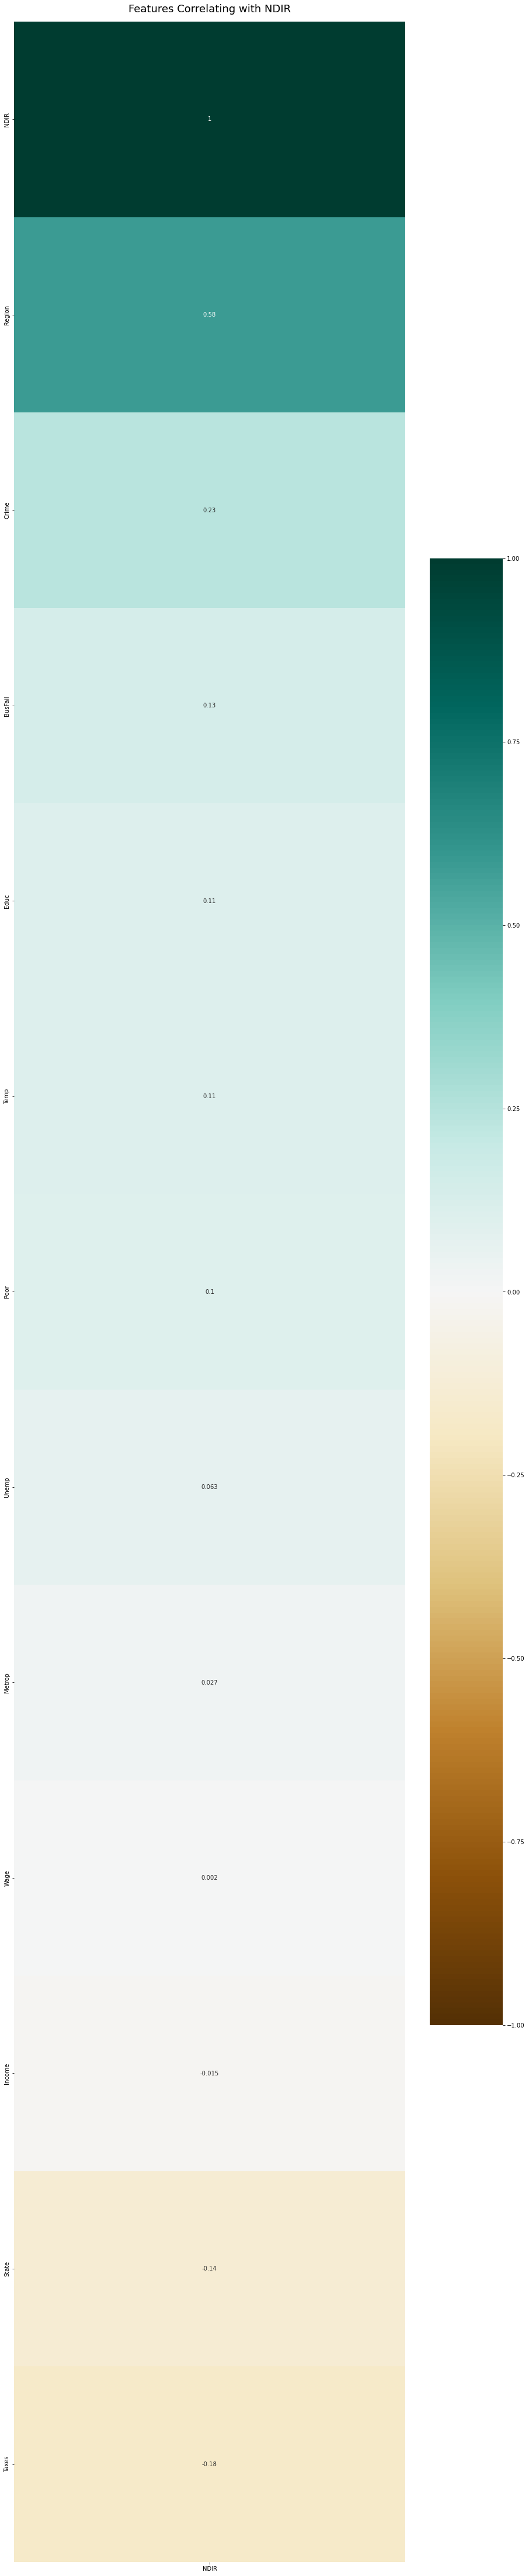

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 80))
heatmap = sns.heatmap(dataset.corr()[['NDIR']].sort_values(by='NDIR', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with NDIR', fontdict={'fontsize':18}, pad=16);

In [11]:
y=dataset["NDIR"]
x=dataset.drop(['NDIR'],axis=1)


# Splitting Data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=15)

In [13]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

-8.587052852055255

In [17]:
pred=model.predict(x_test)
pred

array([ 32.69971921,  -3.96805498, -10.49175858])

In [18]:
y_test

37    11.88
24    -0.62
20     9.46
Name: NDIR, dtype: float64